In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e21/sample_submission.csv


In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s3e21/sample_submission.csv')

In [5]:
rf = RandomForestRegressor(
           n_estimators=1000,
           max_depth=7,
           n_jobs=-1,
           random_state=42)

In [6]:
def model_rmse(df, rf):
    y = df['target']
    X = df.drop('target', axis=1)
    scores = cross_val_score(rf, X, y, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_score = rmse_scores.mean()
    print("Cross-Validation RMSE:", rmse_scores)
    print("Mean RMSE:", mean_score)

-----------------------------------------------
# **Introduction to data**
------------------------------------------------------------

In [25]:
model_rmse(df, rf)

Cross-Validation RMSE: [1.9660743  3.08088336 1.02183173 0.98839722 1.10368933 1.22949942
 1.13073524 0.86513166 0.99123123 1.39315088]
Mean RMSE: 1.3770624373999154


In [26]:
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3500 non-null   int64  
 1   target  3500 non-null   float64
 2   O2_1    3500 non-null   float64
 3   O2_2    3500 non-null   float64
 4   O2_3    3500 non-null   float64
 5   O2_4    3500 non-null   float64
 6   O2_5    3500 non-null   float64
 7   O2_6    3500 non-null   float64
 8   O2_7    3500 non-null   float64
 9   NH4_1   3500 non-null   float64
 10  NH4_2   3500 non-null   float64
 11  NH4_3   3500 non-null   float64
 12  NH4_4   3500 non-null   float64
 13  NH4_5   3500 non-null   float64
 14  NH4_6   3500 non-null   float64
 15  NH4_7   3500 non-null   float64
 16  NO2_1   3500 non-null   float64
 17  NO2_2   3500 non-null   float64
 18  NO2_3   3500 non-null   float64
 19  NO2_4   3500 non-null   float64
 20  NO2_5   3500 non-null   float64
 21  NO2_6   3500 non-null   float64
 22  

In [28]:
df.shape

(3500, 37)

In [29]:
print(df.describe())

                id       target         O2_1         O2_2         O2_3  \
count  3500.000000  3500.000000  3500.000000  3500.000000  3500.000000   
mean   1749.500000     8.473834     8.216993     9.291581     9.633064   
std    1010.507298     1.885712     3.040743     6.817822     1.439039   
min       0.000000     1.300000     0.000000     0.000000     4.900000   
25%     874.750000     7.470000     7.100000     7.300000     8.770000   
50%    1749.500000     8.280000     7.890000     8.300000     9.500000   
75%    2624.250000     9.110000     9.100000     8.700000     9.545000   
max    3499.000000    65.930000    46.950000    65.950000    16.900000   

              O2_4         O2_5         O2_6         O2_7        NH4_1  ...  \
count  3500.000000  3500.000000  3500.000000  3500.000000  3500.000000  ...   
mean      8.065733     5.671581     9.461363     6.547433     0.340525  ...   
std       1.463881     2.721399     1.140365     1.663266     0.284751  ...   
min       2.30000

----------------------------------------------
**O2_1 - O2_4**
----------------------------------------------------------------------

Text(0.5, 1.0, 'O2_4')

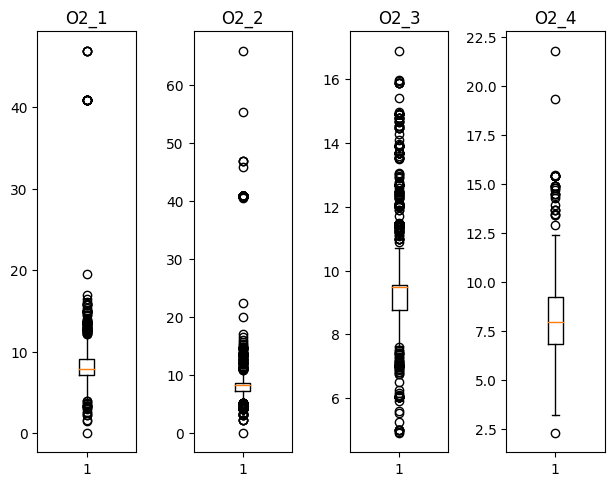

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['O2_1'])
axs[1].boxplot(df['O2_2'])
axs[2].boxplot(df['O2_3'])
axs[3].boxplot(df['O2_4'])

axs[0].set_title('O2_1')
axs[1].set_title('O2_2')
axs[2].set_title('O2_3')
axs[3].set_title('O2_4')

<Axes: >

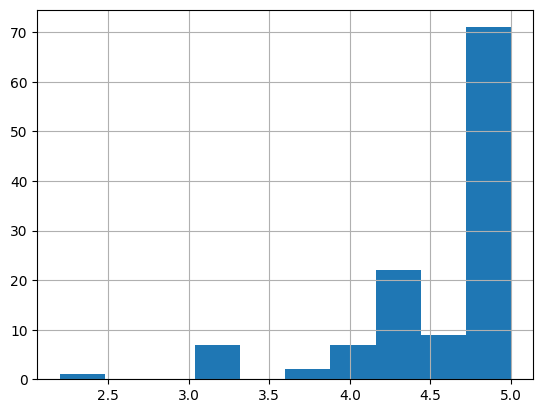

In [88]:
# 02_02
df.O2_1[df.O2_1 < 5].hist()

In [32]:
# 02_01
model_rmse(df[df.O2_1 < 40], rf)

Cross-Validation RMSE: [0.99773997 1.16730471 1.01081208 0.94812606 1.07881714 1.08944332
 1.1249427  0.86925225 0.91271971 1.12900989]
Mean RMSE: 1.0328167821028194


In [45]:
# 02_01
model_rmse(df[df.O2_1 < 17.5], rf)

Cross-Validation RMSE: [1.00279647 1.16183133 1.01568578 0.94748889 1.07744526 1.08280964
 1.12586238 0.85939866 0.9259306  1.11336329]
Mean RMSE: 1.0312612298136399


<Axes: >

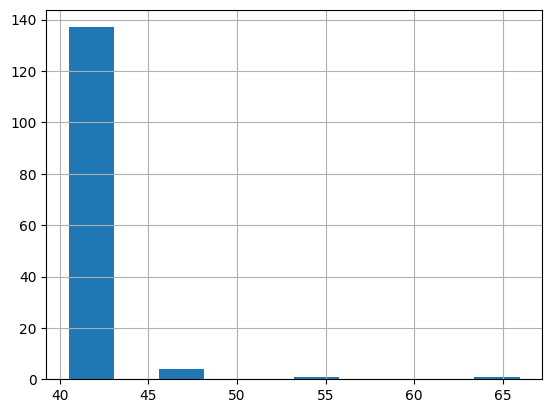

In [59]:
# 02_02
df.O2_2[df.O2_2 > 40].hist()

<Axes: >

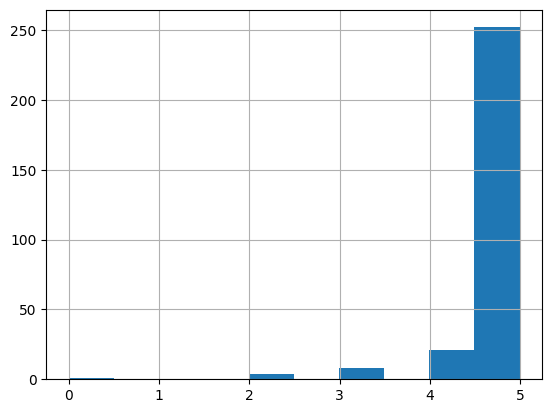

In [76]:
# 02_02
df.O2_2[df.O2_2 < 5].hist()

In [60]:
# 02_02
model_rmse(df[df.O2_2 < 45], rf)

Cross-Validation RMSE: [1.95911131 1.18095657 1.02258168 0.99552415 1.09260568 1.22354358
 1.13072352 0.86281883 0.98917408 1.34812175]
Mean RMSE: 1.1805161145185976


In [57]:
# 02_02
model_rmse(df[df.O2_2 < 30], rf)

Cross-Validation RMSE: [1.02388741 1.19180728 1.05581402 0.99986613 1.13733778 1.06899663
 1.13730071 0.88441024 0.89985455 1.13717602]
Mean RMSE: 1.0536450782714883


<Axes: >

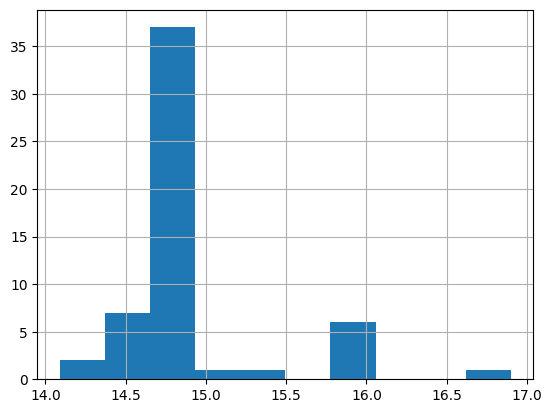

In [39]:
# 02_03
df.O2_3[df.O2_3 > 14].hist()

In [61]:
# 02_03
model_rmse(df[df.O2_3 < 16.5], rf)

Cross-Validation RMSE: [1.96409277 3.08490029 1.02038675 0.98342472 1.10359098 1.22973351
 1.13647393 0.86946924 0.99210236 1.39068705]
Mean RMSE: 1.377486159911884


In [62]:
# 02_03
model_rmse(df[df.O2_3 < 15.5], rf)

Cross-Validation RMSE: [1.95140904 3.0919885  1.03171342 0.97260686 1.12265253 1.21831701
 1.13512959 0.86899481 1.00106348 1.43076811]
Mean RMSE: 1.3824643344720946


<Axes: >

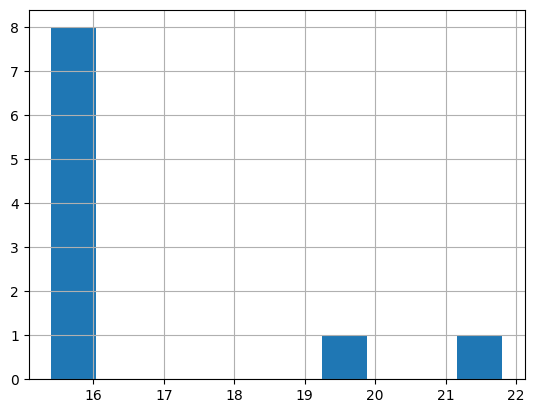

In [65]:
# 02_04
df.O2_4[df.O2_4 > 15].hist()

<Axes: >

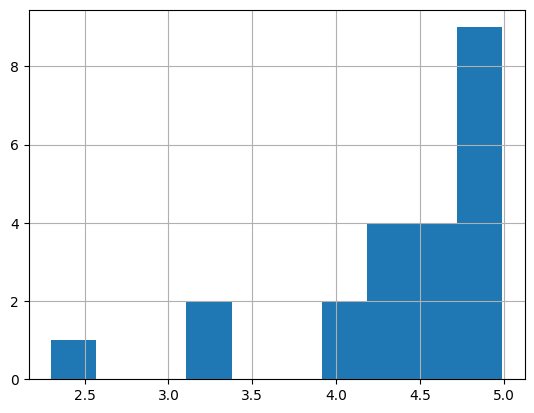

In [69]:
# 02_04
df.O2_4[df.O2_4 < 5].hist()

In [71]:
# 02_04
model_rmse(df[(df.O2_4 < 16.5) & (df.O2_4 > 3.5)], rf)

Cross-Validation RMSE: [1.96561901 3.1059773  1.02361055 0.98107259 1.102145   1.22972811
 1.12974439 0.87640356 0.99808812 1.38600635]
Mean RMSE: 1.3798394976110075


In [8]:
df = df[(df.O2_1 < 17.5) & (df.O2_1 > 3.5) 
        & (df.O2_2 < 20) & (df.O2_2 > 4) 
        & (df.O2_3 < 16.5) 
        & (df.O2_4 < 16.5) & (df.O2_4 > 3.5)]
model_rmse(df, rf)

Text(0.5, 1.0, 'O2_4')

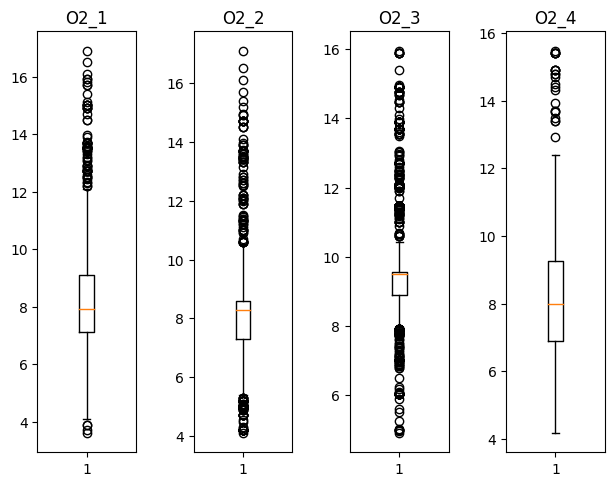

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['O2_1'])
axs[1].boxplot(df['O2_2'])
axs[2].boxplot(df['O2_3'])
axs[3].boxplot(df['O2_4'])

axs[0].set_title('O2_1')
axs[1].set_title('O2_2')
axs[2].set_title('O2_3')
axs[3].set_title('O2_4')

--------------------------------------------
**O2_5 - O2_7**
-----

Text(0.5, 1.0, 'O2_7')

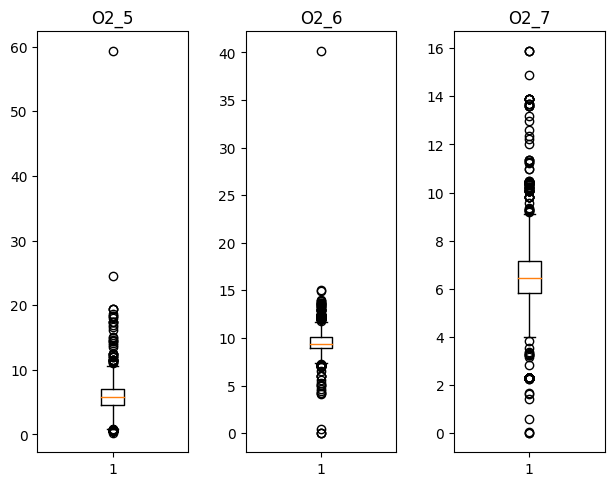

In [96]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['O2_5'])
axs[1].boxplot(df['O2_6'])
axs[2].boxplot(df['O2_7'])


axs[0].set_title('O2_5')
axs[1].set_title('O2_6')
axs[2].set_title('O2_7')

<Axes: >

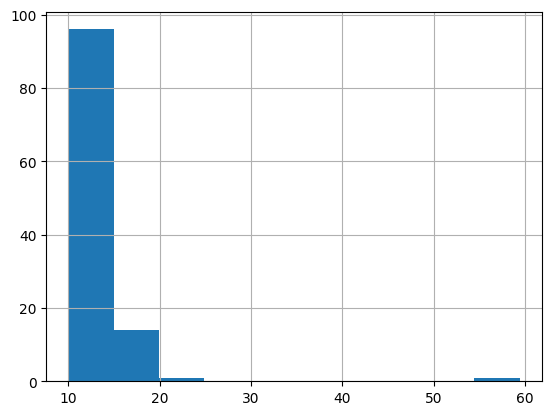

In [94]:
# 02_05
df.O2_5[df.O2_5 > 10].hist()

In [100]:
# 02_05
model_rmse(df[df.O2_5 < 30], rf)

Cross-Validation RMSE: [0.94481478 1.18741737 0.99690686 0.92899767 1.09467579 1.03823172
 1.14258422 0.87519381 0.88159641 1.13223048]
Mean RMSE: 1.0222649106574242


<Axes: >

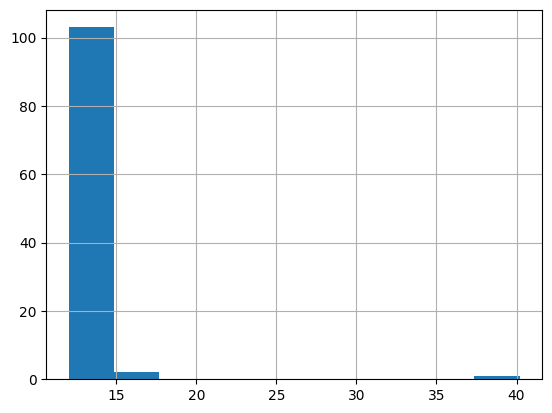

In [106]:
# 02_6
df.O2_6[df.O2_6 > 12].hist()

<Axes: >

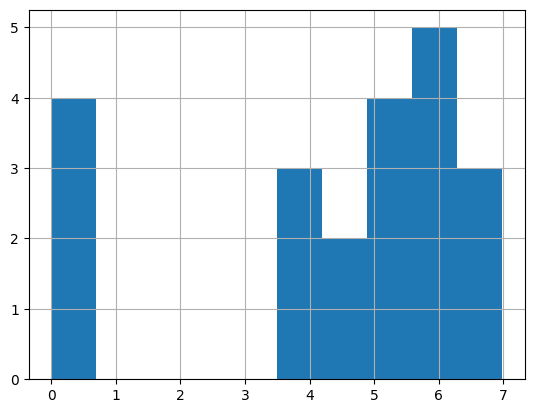

In [102]:
# 02_6
df.O2_6[df.O2_6 < 7].hist()

In [107]:
# 02_06
model_rmse(df[(df.O2_6 < 20) & (df.O2_6 > 3)], rf)

Cross-Validation RMSE: [0.95160834 1.17597262 1.00046379 0.93274659 1.09116823 1.03865819
 1.13661294 0.8776678  0.88114402 1.1291946 ]
Mean RMSE: 1.0215237128204024


<Axes: >

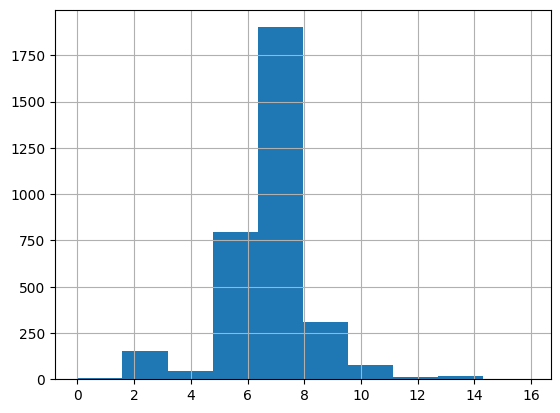

In [108]:
# 02_07
df.O2_7.hist()

In [9]:
df = df[(df.O2_5 < 22)
        & (df.O2_6 < 14.3) & (df.O2_6 > 3)
       & (df.O2_7 < 14) & (df.O2_7 > 1.5)]
model_rmse(df, rf)

Text(0.5, 1.0, 'O2_7')

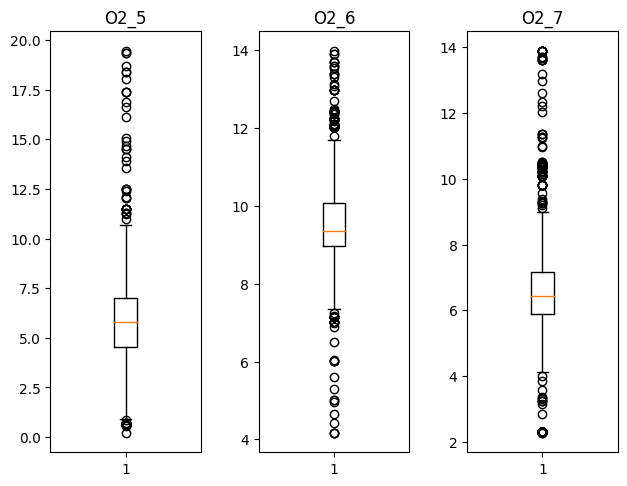

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['O2_5'])
axs[1].boxplot(df['O2_6'])
axs[2].boxplot(df['O2_7'])


axs[0].set_title('O2_5')
axs[1].set_title('O2_6')
axs[2].set_title('O2_7')

--------------------------------------------
**NH4_1 - NH4_4**
-----

Text(0.5, 1.0, 'NH4_4')

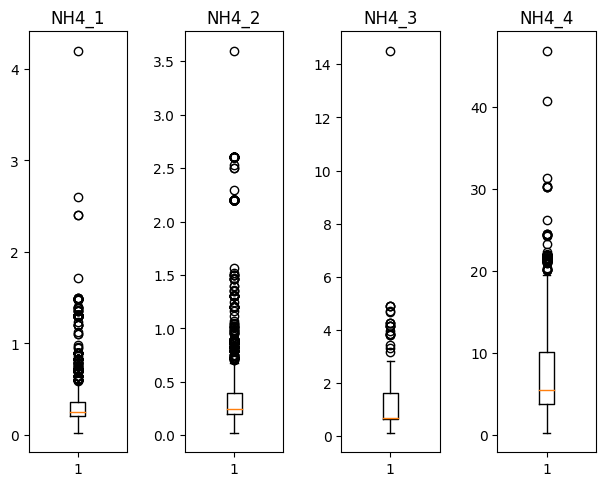

In [119]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NH4_1'])
axs[1].boxplot(df['NH4_2'])
axs[2].boxplot(df['NH4_3'])
axs[3].boxplot(df['NH4_4'])

axs[0].set_title('NH4_1')
axs[1].set_title('NH4_2')
axs[2].set_title('NH4_3')
axs[3].set_title('NH4_4')

<Axes: >

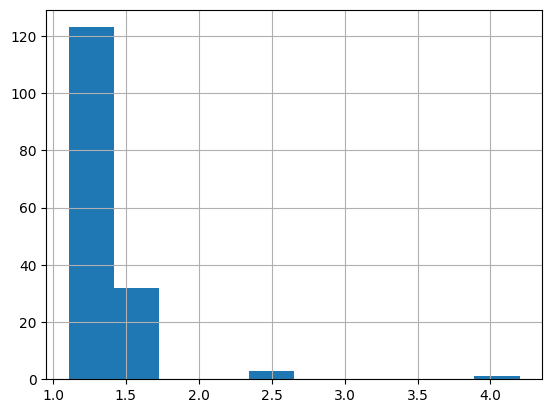

In [123]:
# NH4_1
df.NH4_1[df.NH4_1 > 1.0].hist()

In [127]:
# NH4_1
model_rmse(df[df.NH4_1 < 2], rf)

Cross-Validation RMSE: [0.95171898 1.19365858 1.00389337 0.92047972 1.07385502 1.03658762
 1.1436005  0.8762415  0.88248145 1.13116976]
Mean RMSE: 1.0213686497341423


<Axes: >

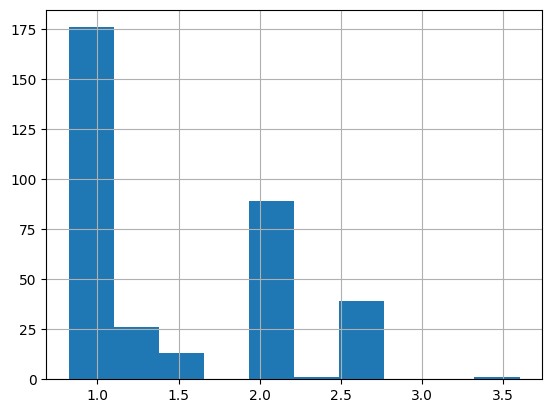

In [125]:
# NH4_2
df.NH4_2[df.NH4_2 > 0.8].hist()

<Axes: >

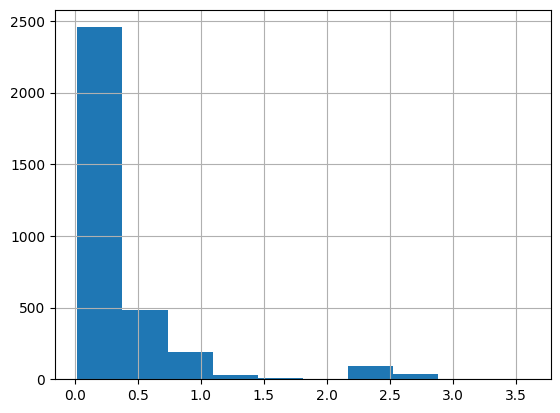

In [126]:
df.NH4_2.hist()

In [128]:
# NH4_2
model_rmse(df[df.NH4_2 < 3], rf)

Cross-Validation RMSE: [0.95140277 1.19218259 1.00355851 0.92906251 1.06598737 1.03528161
 1.14579023 0.87403486 0.8859063  1.13061316]
Mean RMSE: 1.0213819905335624


In [129]:
# NH4_2
model_rmse(df[df.NH4_2 < 2], rf)

Cross-Validation RMSE: [0.92401347 1.20315929 1.00659436 0.9321969  1.07960328 0.98060763
 1.16057017 0.88394735 0.89305742 1.14642738]
Mean RMSE: 1.0210177253446486


In [130]:
# NH4_3
model_rmse(df[df.NH4_3 < 6], rf)

Cross-Validation RMSE: [0.94961006 1.19061242 1.0025593  0.92368947 1.06642916 1.03703026
 1.14422477 0.87542082 0.88628559 1.13119972]
Mean RMSE: 1.02070615459744


<Axes: >

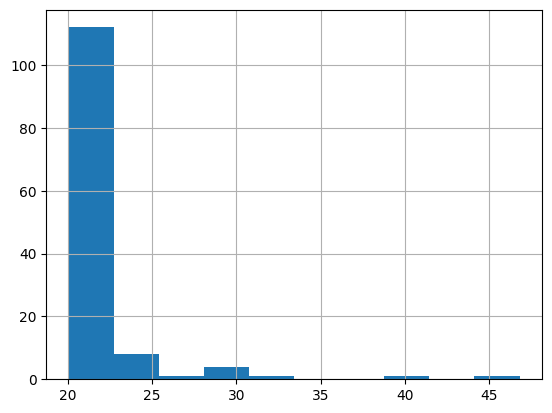

In [131]:
# NH4_4
df.NH4_4[df.NH4_4 > 20].hist()

In [132]:
# NH4_4
model_rmse(df[df.NH4_4 < 40], rf)

Cross-Validation RMSE: [0.9459109  1.18876637 1.00057376 0.9237509  1.06504189 1.0341952
 1.14352928 0.87575394 0.88495729 1.12350741]
Mean RMSE: 1.0185986944130394


In [134]:
# NH4_4
model_rmse(df[df.NH4_4 < 35], rf)

Cross-Validation RMSE: [0.9459109  1.18876637 1.00057376 0.9237509  1.06504189 1.0341952
 1.14352928 0.87575394 0.88495729 1.12350741]
Mean RMSE: 1.0185986944130394


In [136]:
# NH4_4
model_rmse(df[df.NH4_4 < 27], rf)

Cross-Validation RMSE: [0.95050476 1.19117462 1.00430623 0.92538947 1.06745361 1.03089816
 1.14615046 0.87565801 0.89032837 1.12487385]
Mean RMSE: 1.020673753151576


In [10]:
df = df[(df.NH4_1 < 2)
        & (df.NH4_2 < 2)
       & (df.NH4_3 < 6)
        & (df.NH4_4 < 35)]
model_rmse(df, rf)

Text(0.5, 1.0, 'NH4_4')

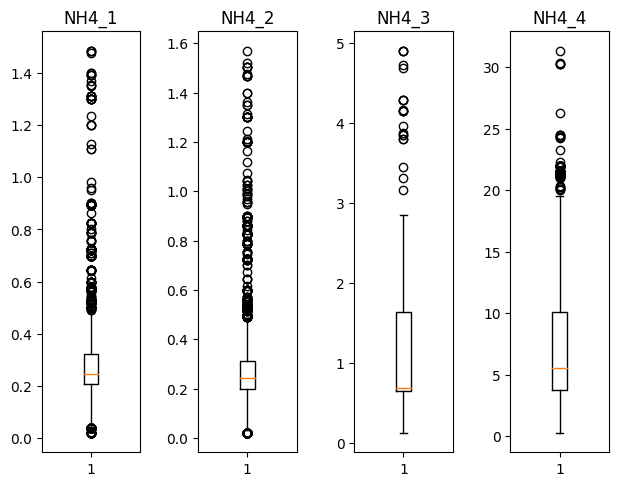

In [140]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NH4_1'])
axs[1].boxplot(df['NH4_2'])
axs[2].boxplot(df['NH4_3'])
axs[3].boxplot(df['NH4_4'])

axs[0].set_title('NH4_1')
axs[1].set_title('NH4_2')
axs[2].set_title('NH4_3')
axs[3].set_title('NH4_4')

--------------------------------------------
**NH4_5 - NH4_7**
-----

Text(0.5, 1.0, 'NH4_7')

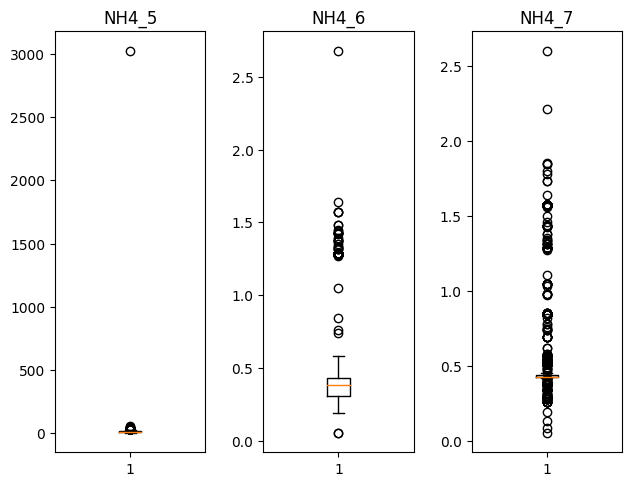

In [138]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NH4_5'])
axs[1].boxplot(df['NH4_6'])
axs[2].boxplot(df['NH4_7'])

axs[0].set_title('NH4_5')
axs[1].set_title('NH4_6')
axs[2].set_title('NH4_7')

<Axes: >

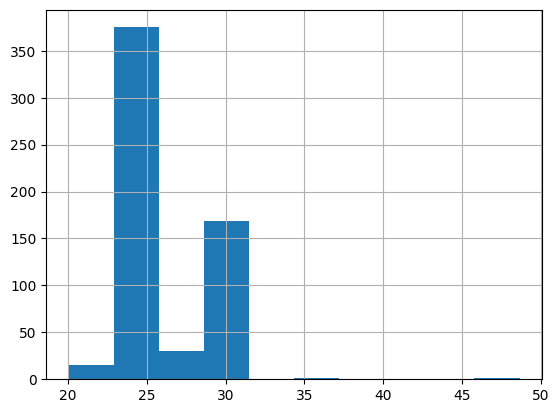

In [153]:
df.NH4_5[(df.NH4_5 < 50) & (df.NH4_5 > 20)].hist()

In [145]:
# NH4_5
model_rmse(df[df.NH4_5 < 100], rf)

Cross-Validation RMSE: [0.92930901 1.19974834 1.00762557 0.93011103 1.07553878 0.98376609
 1.16147508 0.8746222  0.91094836 1.13988789]
Mean RMSE: 1.0213032348848388


In [146]:
# NH4_6
model_rmse(df[df.NH4_6 < 2], rf)

Cross-Validation RMSE: [0.93029849 1.20322259 1.00614562 0.928749   1.0745157  0.984024
 1.16303979 0.87428204 0.91188375 1.14362556]
Mean RMSE: 1.0219786534416873


In [147]:
# NH4_7
model_rmse(df[df.NH4_7 < 2], rf)

Cross-Validation RMSE: [0.92596159 1.20309446 1.00655829 0.92984575 1.07776929 0.98402692
 1.15905662 0.87404086 0.91394268 1.13926578]
Mean RMSE: 1.0213562248726495


In [11]:
df = df[(df.NH4_5 < 33)
        & (df.NH4_6 < 2)
       & (df.NH4_7 < 2)]
model_rmse(df, rf)

Text(0.5, 1.0, 'NH4_7')

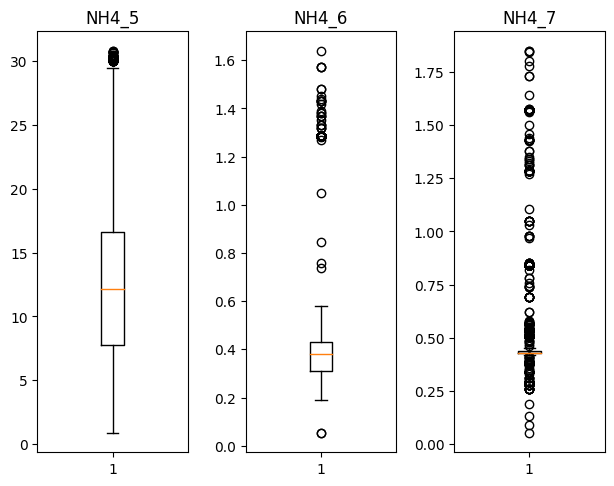

In [155]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NH4_5'])
axs[1].boxplot(df['NH4_6'])
axs[2].boxplot(df['NH4_7'])

axs[0].set_title('NH4_5')
axs[1].set_title('NH4_6')
axs[2].set_title('NH4_7')

--------------------------------------------
**NO2_1 - NO2_4**
-----

Text(0.5, 1.0, 'NO2_4')

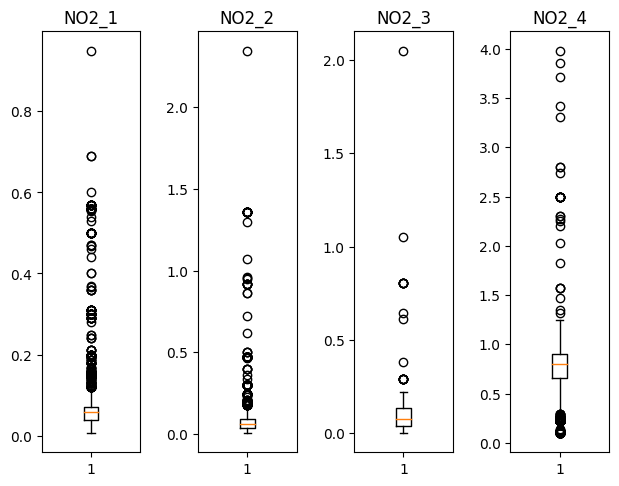

In [150]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NO2_1'])
axs[1].boxplot(df['NO2_2'])
axs[2].boxplot(df['NO2_3'])
axs[3].boxplot(df['NO2_4'])

axs[0].set_title('NO2_1')
axs[1].set_title('NO2_2')
axs[2].set_title('NO2_3')
axs[3].set_title('NO2_4')

<Axes: >

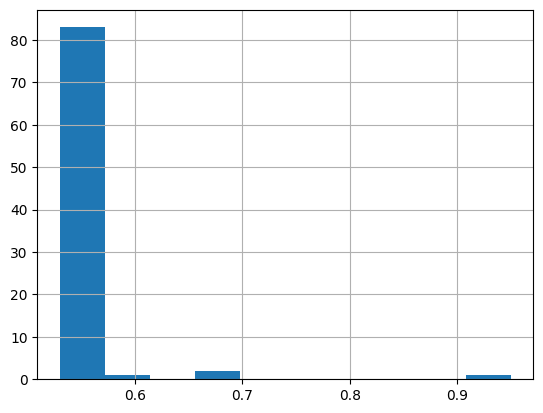

In [163]:
df.NO2_1[(df.NO2_1 > 0.5)].hist()

In [164]:
model_rmse(df[df.NO2_1 < 0.65], rf)

Cross-Validation RMSE: [0.92492302 1.19703811 1.0068297  0.93621379 1.07998501 0.96948994
 1.15361554 0.88540356 0.89587414 1.14244179]
Mean RMSE: 1.0191814602418299


<Axes: >

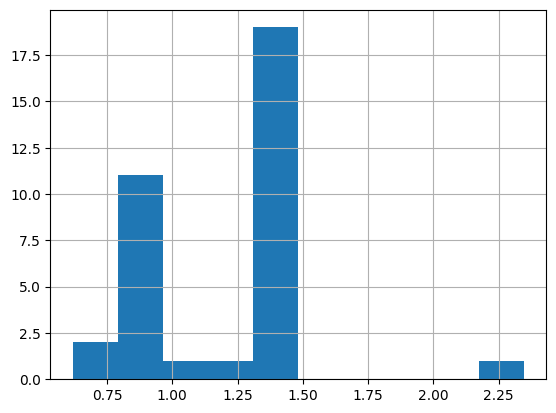

In [165]:
df.NO2_2[(df.NO2_2 > 0.5)].hist()

In [166]:
model_rmse(df[df.NO2_2 < 1.5], rf)

Cross-Validation RMSE: [0.92183964 1.19950735 1.00653715 0.93191902 1.07688334 0.98331337
 1.15994812 0.87455883 0.90405184 1.14359944]
Mean RMSE: 1.0202158108110488


<Axes: >

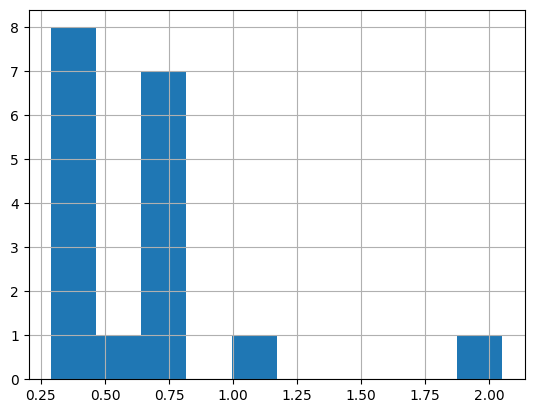

In [167]:
df.NO2_3[(df.NO2_3 > 0.25)].hist()

In [180]:
model_rmse(df[df.NO2_3 < 0.25], rf)

Cross-Validation RMSE: [0.92059691 1.20064022 1.0107232  0.92380493 1.03973856 1.0226003
 1.16057794 0.86508211 0.91632133 1.14530535]
Mean RMSE: 1.0205390869618953


<Axes: >

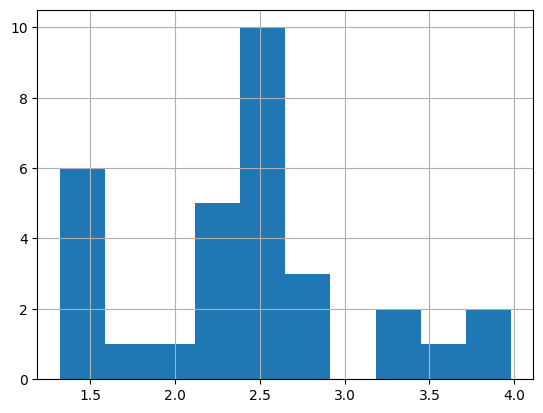

In [176]:
df.NO2_4[(df.NO2_4 > 1.3)].hist()

In [177]:
model_rmse(df[df.NO2_4 < 3.0], rf)

Cross-Validation RMSE: [0.92524376 1.1994693  1.00732511 0.92947741 1.07948124 0.98059461
 1.15964027 0.88581171 0.89579406 1.1409254 ]
Mean RMSE: 1.0203762851561442


In [12]:
df = df[(df.NO2_1 < 0.65)
        & (df.NO2_2 < 1.5)
       & (df.NO2_3 < 0.9)
       & (df.NO2_4 < 3.0)]
model_rmse(df, rf)

Cross-Validation RMSE: [0.92135481 1.20096679 1.00680937 0.92519064 1.08018276 0.96564979
 1.15827789 0.88715509 0.90000345 1.14324691]
Mean RMSE: 1.0188837515923548


Text(0.5, 1.0, 'NO2_4')

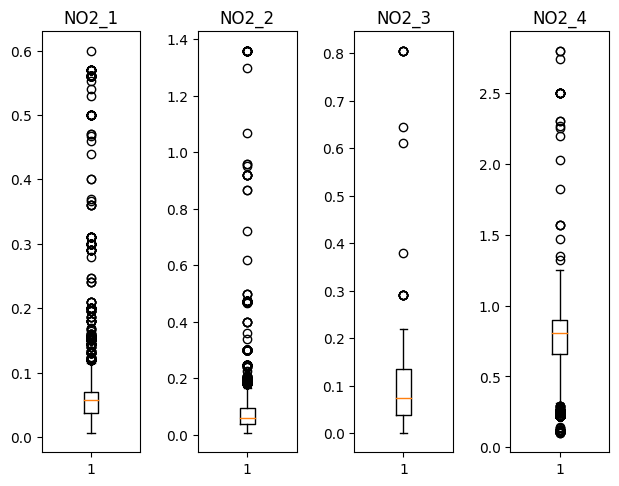

In [179]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NO2_1'])
axs[1].boxplot(df['NO2_2'])
axs[2].boxplot(df['NO2_3'])
axs[3].boxplot(df['NO2_4'])

axs[0].set_title('NO2_1')
axs[1].set_title('NO2_2')
axs[2].set_title('NO2_3')
axs[3].set_title('NO2_4')

In [220]:
df.shape

(3112, 37)

--------------------------------------------
**NO2_5 - NO2_7**
-----

Text(0.5, 1.0, 'NO2_7')

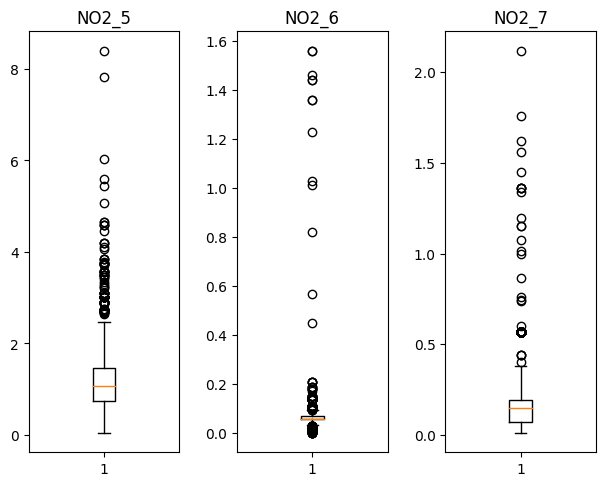

In [182]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NO2_5'])
axs[1].boxplot(df['NO2_6'])
axs[2].boxplot(df['NO2_7'])

axs[0].set_title('NO2_5')
axs[1].set_title('NO2_6')
axs[2].set_title('NO2_7')

<Axes: >

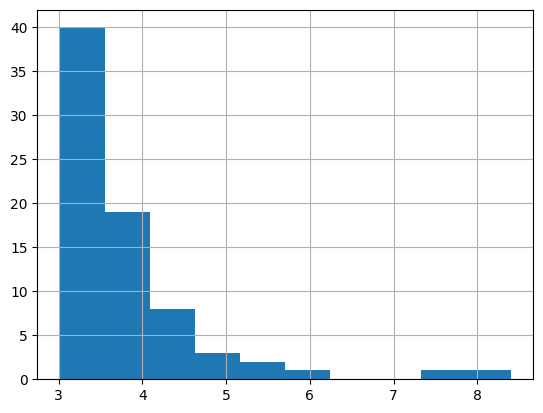

In [188]:
df.NO2_5[(df.NO2_5 > 3)].hist()

In [189]:
model_rmse(df[df.NO2_5 < 7], rf)

Cross-Validation RMSE: [0.91837042 1.2071853  1.01000811 0.92912819 1.07500819 0.97170559
 1.15567468 0.88485021 0.90014574 1.14579283]
Mean RMSE: 1.019786924962596


<Axes: >

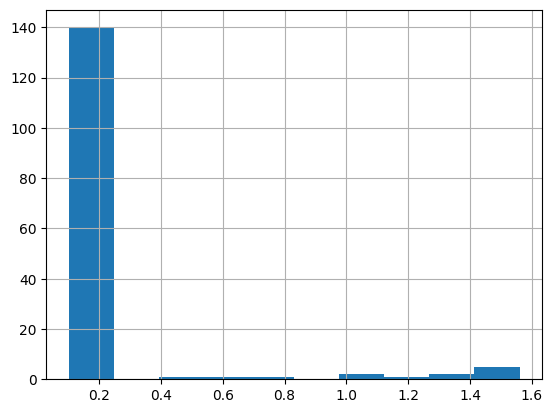

In [190]:
df.NO2_6[(df.NO2_6 > 0.1)].hist()

In [193]:
model_rmse(df[df.NO2_6 < 0.3], rf)

Cross-Validation RMSE: [0.92120603 1.19631658 0.99941108 0.93081335 1.03271641 0.96321334
 1.1559014  0.87807304 0.90631411 1.13512692]
Mean RMSE: 1.011909225612929


<Axes: >

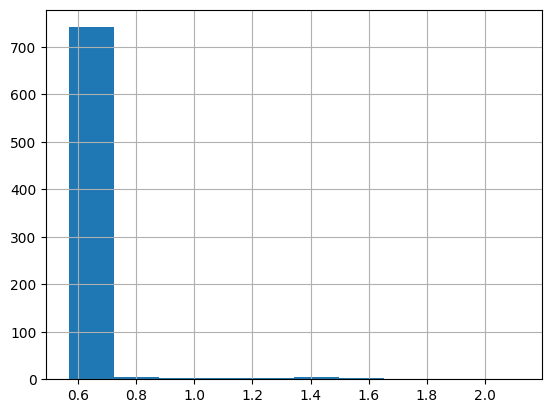

In [203]:
df.NO2_7[(df.NO2_7 > 0.56)].hist()

In [207]:
model_rmse(df[df.NO2_7 < 0.58], rf)

Cross-Validation RMSE: [0.9204341  1.20328156 1.0031981  0.91917625 1.08523536 0.96471375
 1.15322858 0.87295384 0.908955   1.1469953 ]
Mean RMSE: 1.017817183202168


In [219]:
model_rmse(df[df.NO2_7 < 0.5], rf)

Cross-Validation RMSE: [0.94373638 1.16152809 1.00474573 0.97235061 1.02575566 0.99098175
 1.13548257 0.90190322 0.86222979 1.1935732 ]
Mean RMSE: 1.0192286991411221


In [13]:
df = df[(df.NO2_5 < 7)
        & (df.NO2_6 < 0.3)
       & (df.NO2_7 < 0.57)]
model_rmse(df, rf)

Text(0.5, 1.0, 'NO2_7')

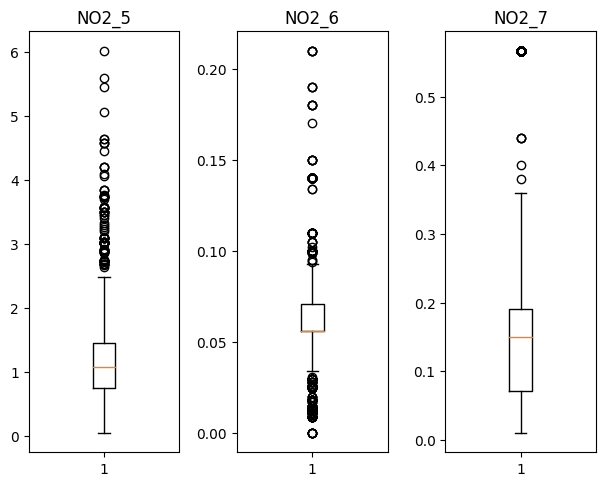

In [218]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NO2_5'])
axs[1].boxplot(df['NO2_6'])
axs[2].boxplot(df['NO2_7'])

axs[0].set_title('NO2_5')
axs[1].set_title('NO2_6')
axs[2].set_title('NO2_7')

--------------------------------------------
**NO3_1 - NO3_4**
-----

Text(0.5, 1.0, 'NO3_4')

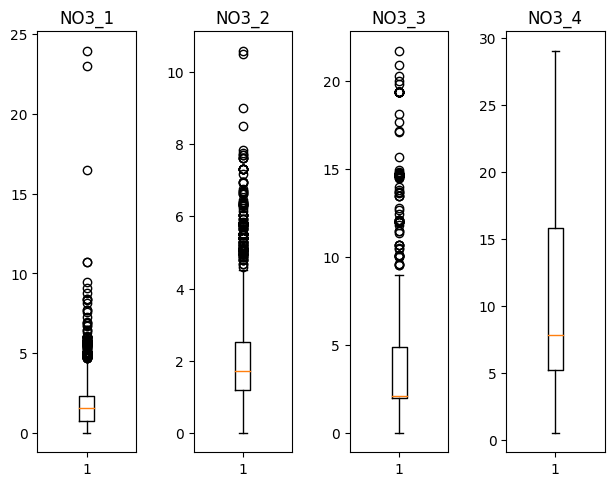

In [156]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NO3_1'])
axs[1].boxplot(df['NO3_2'])
axs[2].boxplot(df['NO3_3'])
axs[3].boxplot(df['NO3_4'])

axs[0].set_title('NO3_1')
axs[1].set_title('NO3_2')
axs[2].set_title('NO3_3')
axs[3].set_title('NO3_4')

<Axes: >

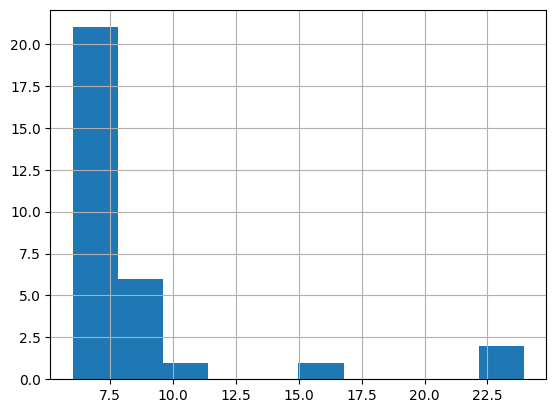

In [223]:
df.NO3_1[(df.NO3_1 > 6)].hist()

In [226]:
model_rmse(df[df.NO3_1 < 12], rf)

Cross-Validation RMSE: [0.92115241 1.19634972 0.99532113 0.9233333  1.0407126  0.96502633
 1.14881988 0.87325224 0.9012452  1.14330645]
Mean RMSE: 1.0108519269709655


In [232]:
model_rmse(df[df.NO3_1 < 10], rf)

Cross-Validation RMSE: [0.92092405 1.19824729 0.99300548 0.92535514 1.03642675 0.96233787
 1.14760781 0.87832636 0.9003733  1.14551688]
Mean RMSE: 1.0108120944352372


<Axes: >

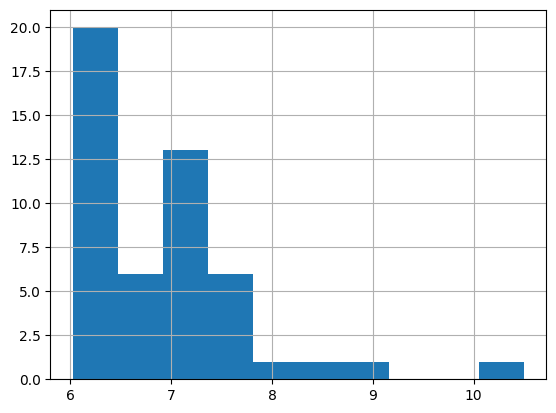

In [224]:
df.NO3_2[(df.NO3_2 > 6)].hist()

In [227]:
model_rmse(df[df.NO3_2 < 9], rf)

Cross-Validation RMSE: [0.92419811 1.19490011 0.99404863 0.92381894 1.03949025 0.96483649
 1.14725489 0.87304663 0.89670544 1.14166788]
Mean RMSE: 1.0099967360742763


In [233]:
model_rmse(df[df.NO3_2 < 8], rf)

Cross-Validation RMSE: [0.92143291 1.19327463 0.9898553  0.92156196 1.0364993  0.96375398
 1.15153613 0.87604508 0.89961567 1.14570429]
Mean RMSE: 1.0099279231025127


<Axes: >

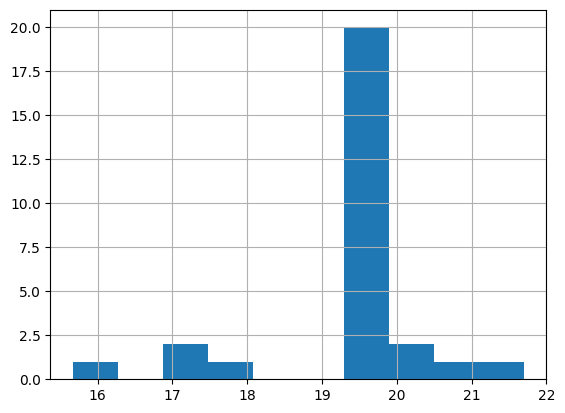

In [229]:
df.NO3_3[(df.NO3_3 > 15)].hist()

In [228]:
model_rmse(df[df.NO3_3 < 16], rf)

Cross-Validation RMSE: [0.91606296 1.20299176 0.99159103 0.92893436 1.04276791 0.95877058
 1.15860243 0.87291859 0.89784478 1.14282713]
Mean RMSE: 1.0113311510003364


In [14]:
df = df[(df.NO3_1 < 10)
        & (df.NO3_2 < 8)]
model_rmse(df, rf)

Text(0.5, 1.0, 'NO3_4')

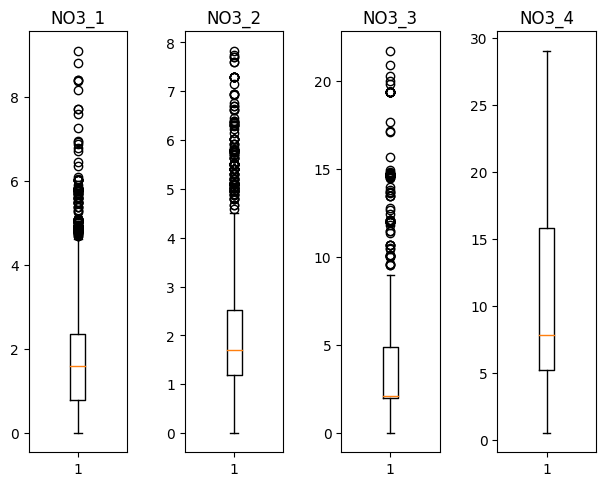

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NO3_1'])
axs[1].boxplot(df['NO3_2'])
axs[2].boxplot(df['NO3_3'])
axs[3].boxplot(df['NO3_4'])

axs[0].set_title('NO3_1')
axs[1].set_title('NO3_2')
axs[2].set_title('NO3_3')
axs[3].set_title('NO3_4')

In [234]:
df.shape

(3107, 37)

--------------------------------------------
**NO3_5 - NO3_7**
-----

Text(0.5, 1.0, 'NO3_7')

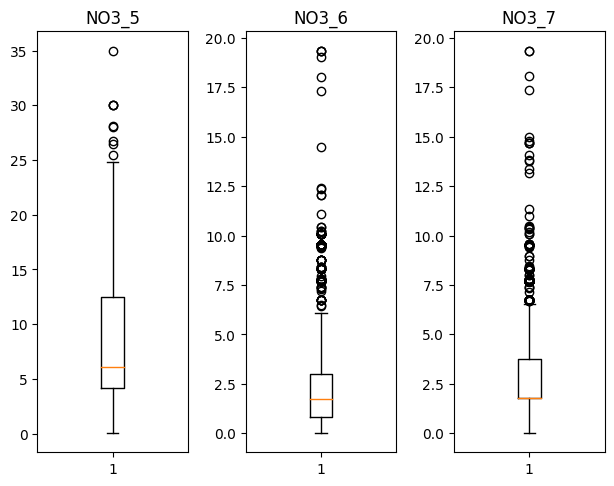

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NO3_5'])
axs[1].boxplot(df['NO3_6'])
axs[2].boxplot(df['NO3_7'])

axs[0].set_title('NO3_5')
axs[1].set_title('NO3_6')
axs[2].set_title('NO3_7')

<Axes: >

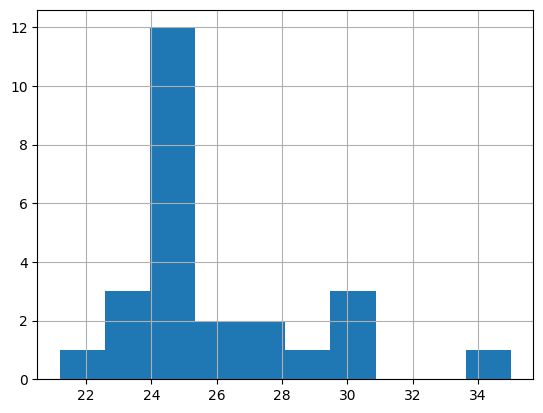

In [22]:
df.NO3_5[(df.NO3_5 > 21)].hist()

In [25]:
model_rmse(df[df.NO3_5 < 26], rf)

Cross-Validation RMSE: [0.92594579 1.19996956 0.99102543 0.92403028 1.03991035 0.95991591
 1.15079312 0.87604665 0.89881814 1.14486721]
Mean RMSE: 1.0111322454991938


<Axes: >

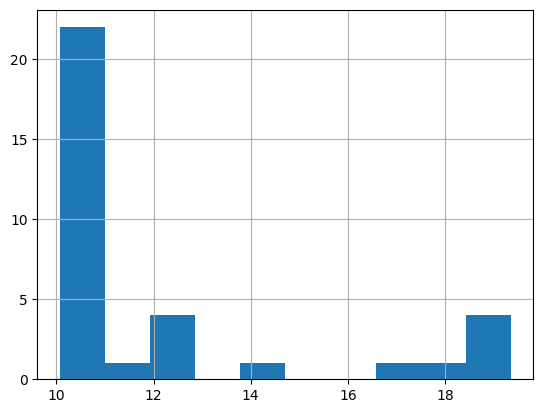

In [21]:
df.NO3_6[(df.NO3_6 > 10)].hist()

In [26]:
model_rmse(df[df.NO3_6 < 11], rf)

Cross-Validation RMSE: [0.92002179 1.19719184 0.99269778 0.91881183 1.04139976 0.9605167
 1.14921229 0.87969157 0.89805435 0.93705534]
Mean RMSE: 0.9894653241436892


<Axes: >

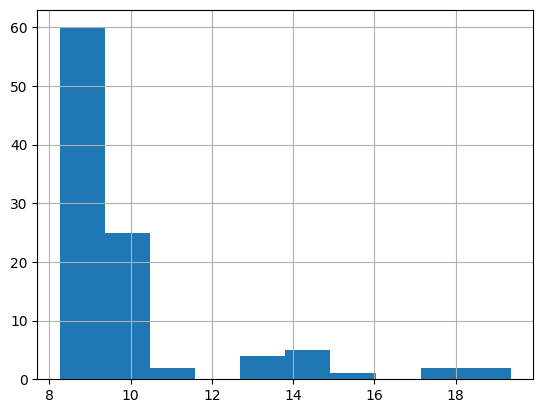

In [24]:
df.NO3_7[(df.NO3_7 > 8)].hist()

<Axes: >

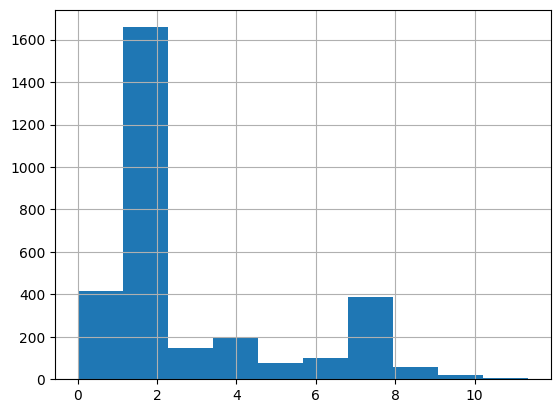

In [32]:
df.NO3_7.hist()

In [28]:
model_rmse(df[df.NO3_7 < 12], rf)

Cross-Validation RMSE: [0.92687519 1.20100389 0.99047728 0.92116706 1.03468776 0.96272297
 1.15441772 0.8780709  0.89043861 1.14554032]
Mean RMSE: 1.0105401706652466


In [29]:
df = df[(df.NO3_5 < 26)
        & (df.NO3_6 < 11)
       & (df.NO3_7 < 12)]
model_rmse(df, rf)

Cross-Validation RMSE: [0.92552166 1.20277553 0.99047389 0.92168326 1.02883581 0.97102278
 1.15385906 0.88301362 0.88926669 0.93531845]
Mean RMSE: 0.99017707484883


Text(0.5, 1.0, 'NO3_7')

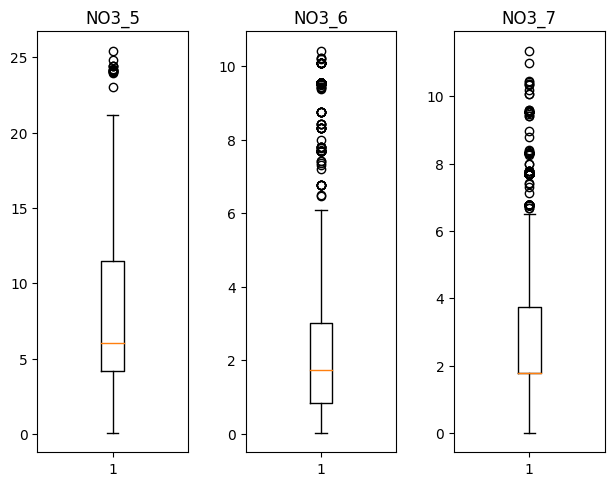

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['NO3_5'])
axs[1].boxplot(df['NO3_6'])
axs[2].boxplot(df['NO3_7'])

axs[0].set_title('NO3_5')
axs[1].set_title('NO3_6')
axs[2].set_title('NO3_7')

In [34]:
df.shape

(3075, 37)

--------------------------------------------
**BOD5_1 - BOD5_4**
-----

Text(0.5, 1.0, 'BOD5_4')

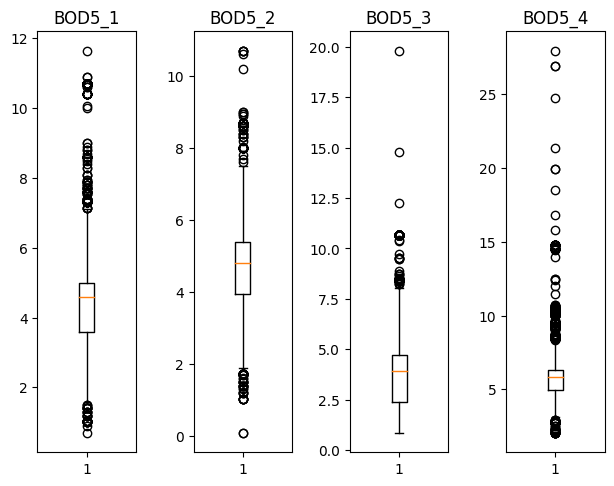

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['BOD5_1'])
axs[1].boxplot(df['BOD5_2'])
axs[2].boxplot(df['BOD5_3'])
axs[3].boxplot(df['BOD5_4'])

axs[0].set_title('BOD5_1')
axs[1].set_title('BOD5_2')
axs[2].set_title('BOD5_3')
axs[3].set_title('BOD5_4')

<Axes: >

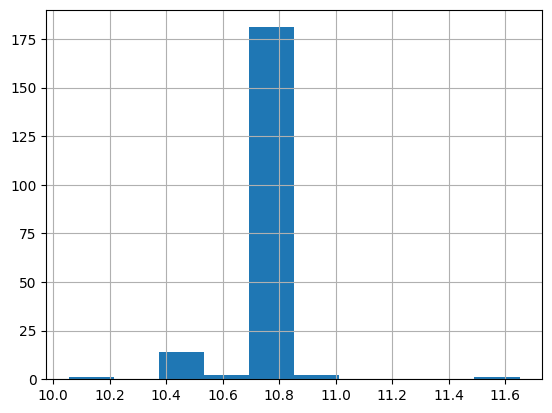

In [39]:
df.BOD5_1[(df.BOD5_1 > 10)].hist()

In [53]:
model_rmse(df[df.BOD5_1 < 11], rf)

Cross-Validation RMSE: [0.91512364 1.19497278 0.99143554 0.92465826 1.02996285 0.96874633
 1.15025213 0.88428913 0.89056304 0.93733892]
Mean RMSE: 0.9887342641360292


<Axes: >

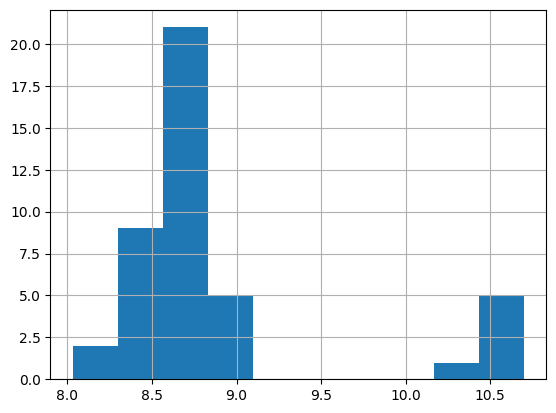

In [42]:
df.BOD5_2[(df.BOD5_2 > 8)].hist()

<Axes: >

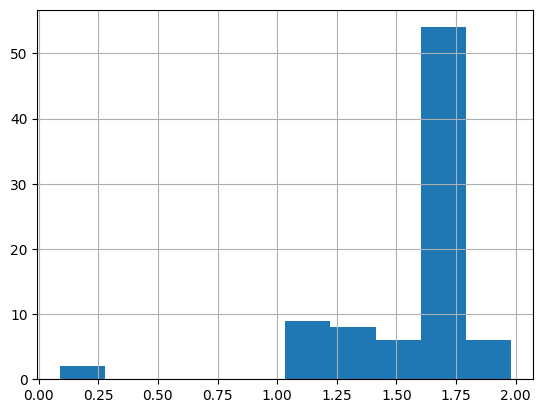

In [63]:
df.BOD5_2[(df.BOD5_2 < 2)].hist()

In [54]:
model_rmse(df[df.BOD5_2 < 9.5], rf)

Cross-Validation RMSE: [0.92716705 1.20331036 0.98936098 0.92178338 1.03192236 0.97095635
 1.14866552 0.88378666 0.89178503 0.92364762]
Mean RMSE: 0.9892385314223396


<Axes: >

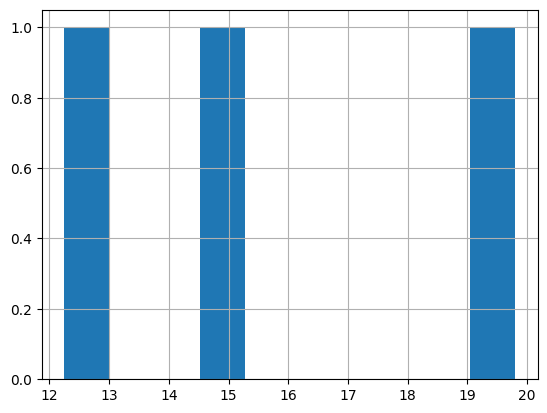

In [49]:
df.BOD5_3[(df.BOD5_3 > 11)].hist()

In [55]:
model_rmse(df[df.BOD5_3 < 11], rf)

Cross-Validation RMSE: [0.9265934  1.19666781 0.99023447 0.92065788 1.0284581  0.96780862
 1.15534358 0.87860658 0.8989858  0.92443507]
Mean RMSE: 0.9887791314638434


<Axes: >

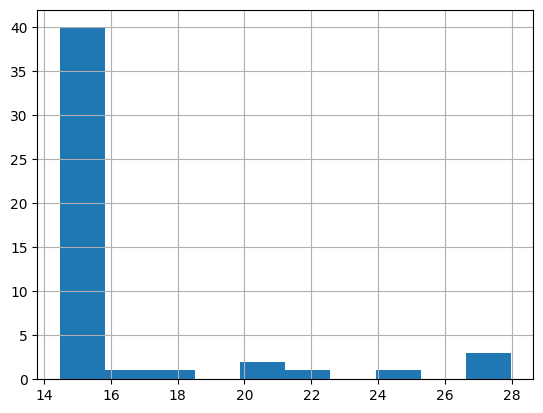

In [51]:
df.BOD5_4[(df.BOD5_4 > 14)].hist()

In [56]:
model_rmse(df[df.BOD5_4 < 16], rf)

Cross-Validation RMSE: [0.92642778 1.20401126 0.99064438 0.92206093 1.03051798 0.96574478
 1.1534965  0.89148563 0.88309194 0.93470034]
Mean RMSE: 0.9902181516062691


In [64]:
df = df[(df.BOD5_1 < 11)
        & (df.BOD5_2 < 9.5) & (df.BOD5_2 > 1)
       & (df.BOD5_3 < 11)
       & (df.BOD5_4 < 15)]
model_rmse(df, rf)

Cross-Validation RMSE: [0.92413196 1.19935636 0.99216226 0.92331425 1.03033155 0.96604461
 1.1545994  0.88321891 0.8942869  0.92643864]
Mean RMSE: 0.9893884833039855


Text(0.5, 1.0, 'BOD5_4')

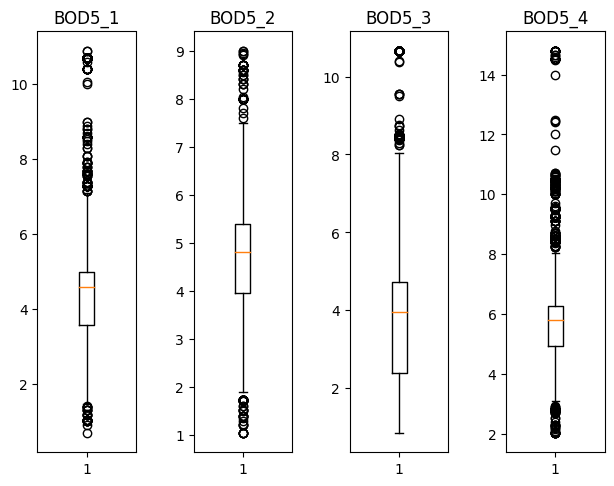

In [65]:
fig, axs = plt.subplots(nrows=1, ncols=4)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['BOD5_1'])
axs[1].boxplot(df['BOD5_2'])
axs[2].boxplot(df['BOD5_3'])
axs[3].boxplot(df['BOD5_4'])

axs[0].set_title('BOD5_1')
axs[1].set_title('BOD5_2')
axs[2].set_title('BOD5_3')
axs[3].set_title('BOD5_4')

--------------------------------------------
**BOD5_5 - BOD5_7**
-----

Text(0.5, 1.0, 'BOD5_7')

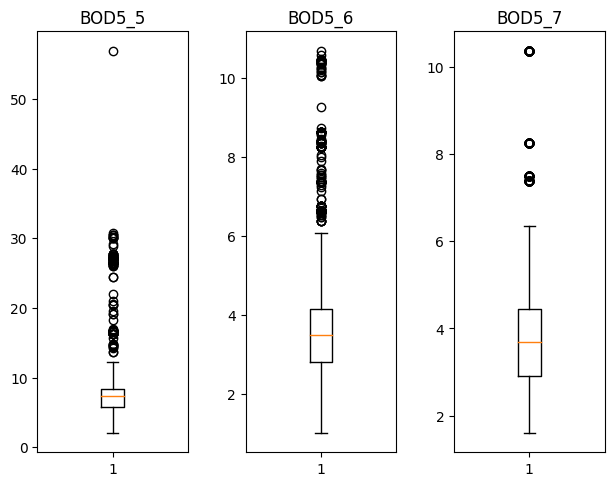

In [67]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['BOD5_5'])
axs[1].boxplot(df['BOD5_6'])
axs[2].boxplot(df['BOD5_7'])

axs[0].set_title('BOD5_5')
axs[1].set_title('BOD5_6')
axs[2].set_title('BOD5_7')

<Axes: >

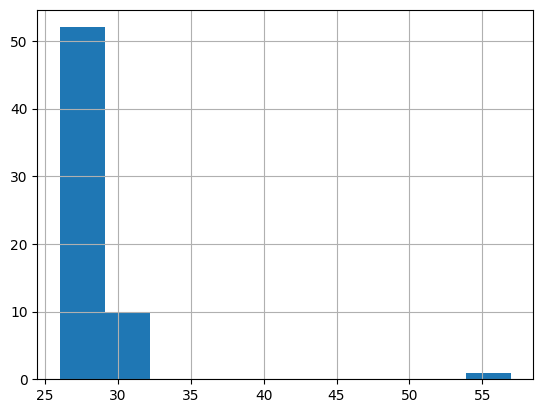

In [71]:
df.BOD5_5[(df.BOD5_5 > 25)].hist()

In [74]:
model_rmse(df[df.BOD5_5 < 35], rf)

Cross-Validation RMSE: [0.92165479 1.19971139 0.99405967 0.91844507 1.02956404 0.96532727
 1.15547534 0.88458019 0.89500772 0.92635759]
Mean RMSE: 0.9890183086920477


<Axes: >

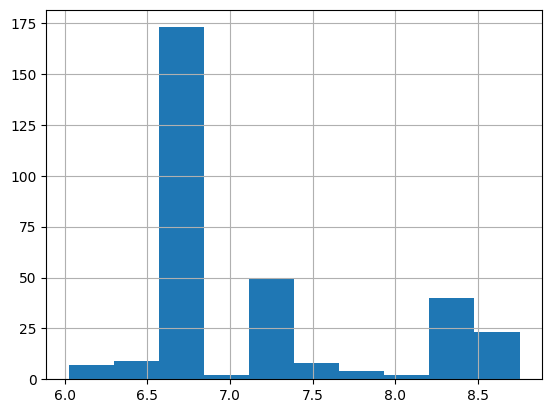

In [78]:
df.BOD5_6[(df.BOD5_6 > 6)].hist()

In [75]:
model_rmse(df[df.BOD5_6 < 9], rf)

Cross-Validation RMSE: [0.92561021 1.20755639 0.99536371 0.92345267 1.02007271 0.95550144
 1.15105259 0.8798727  0.90520145 0.92081548]
Mean RMSE: 0.9884499363307789


<Axes: >

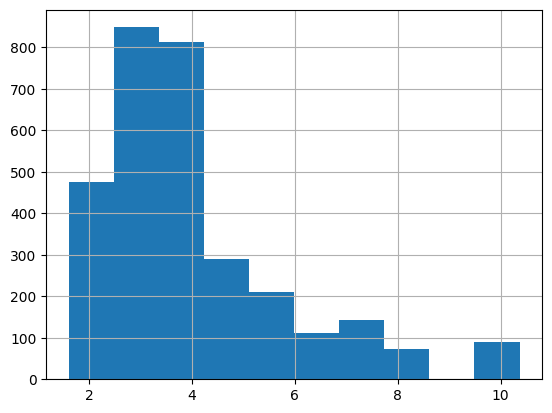

In [73]:
df.BOD5_7.hist()

In [82]:
model_rmse(df[df.BOD5_7 < 7], rf)

Cross-Validation RMSE: [0.92418999 1.23283415 1.02029142 0.92783006 1.0558164  0.96278607
 1.15635206 0.91394402 0.86541897 0.9245236 ]
Mean RMSE: 0.9983986742060296


In [79]:
df = df[(df.BOD5_5 < 35)]
model_rmse(df, rf)

Cross-Validation RMSE: [0.92214722 1.20644752 0.99313236 0.91680358 1.01614164 0.95564187
 1.15366877 0.87855773 0.90347143 0.91691703]
Mean RMSE: 0.9862929126649851


Text(0.5, 1.0, 'BOD5_7')

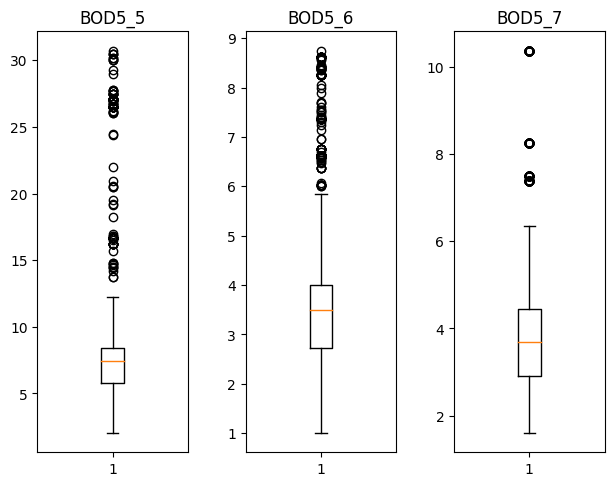

In [80]:
fig, axs = plt.subplots(nrows=1, ncols=3)

fig.tight_layout(h_pad= 2)
axs[0].boxplot(df['BOD5_5'])
axs[1].boxplot(df['BOD5_6'])
axs[2].boxplot(df['BOD5_7'])

axs[0].set_title('BOD5_5')
axs[1].set_title('BOD5_6')
axs[2].set_title('BOD5_7')

In [81]:
df.shape

(3021, 37)

# **Cleaned data**

In [84]:
df_cleaned = df[
    (df.O2_1 < 17.5) & (df.O2_1 > 3.5) 
    & (df.O2_2 < 20) & (df.O2_2 > 4) 
    & (df.O2_3 < 16.5) 
    & (df.O2_4 < 16.5) & (df.O2_4 > 3.5)
    & (df.O2_5 < 22)
    & (df.O2_6 < 14.3) & (df.O2_6 > 3)
    & (df.O2_7 < 14) & (df.O2_7 > 1.5)
    & (df.NH4_1 < 2)
    & (df.NH4_2 < 2)
    & (df.NH4_3 < 6)
    & (df.NH4_4 < 35)
    & (df.NH4_5 < 33)
    & (df.NH4_6 < 2)
    & (df.NH4_7 < 2)
    & (df.NO2_1 < 0.65)
    & (df.NO2_2 < 1.5)
    & (df.NO2_3 < 0.9)
    & (df.NO2_4 < 3.0)
    & (df.NO2_5 < 7)
    & (df.NO2_6 < 0.3)
    & (df.NO2_7 < 0.57)
    & (df.NO3_1 < 10)
    & (df.NO3_2 < 8)
    & (df.NO3_5 < 26)
    & (df.NO3_6 < 11)
    & (df.NO3_7 < 12)
    & (df.BOD5_1 < 11)
    & (df.BOD5_2 < 9.5)
    & (df.BOD5_3 < 11)
    & (df.BOD5_4 < 16)
    & (df.BOD5_5 < 35)
]

In [85]:
df_cleaned.shape

(3021, 37)

In [ ]:
model_rmse(df, rf)

# **Submition**

In [ ]:
df_cleaned.to_csv('submission.csv', index=False)